Stacked 4 files, final shape: (33, 23)


,n,target_tw,achieved_tw,naming,arity,alpha,determinism,seed,variant_index,num_edges,...,evidence,distance,num_evidence,probability,prior_probability,num_unobserved_ancestors,abs_diff,rel_diff,llm_probability,llm_response
0,5,4,4,confusing,range:2-3,1.0,0.0,29963,3,10,...,{np.str_('K_5si3ik'): 's2'},1,1,0.379284,0.249017,3,0.130266,0.523122,0.3792,Final Answer: P(W_qis23b=s1 | K_5si3ik=s2) = 0...
1,5,4,4,confusing,range:2-3,0.5,0.0,10018,1,10,...,{np.str_('G_bo3vt6'): 's2'},1,1,0.767199,0.474219,3,0.292980,0.617815,0.6705,Final Answer: P(W_qis23b=s1 | G_bo3vt6=s2) = 0...
2,5,4,4,confusing,range:2-3,0.5,0.0,19991,2,10,...,{np.str_('X_wzdhd9'): 's2'},1,1,0.642458,0.274380,3,0.368078,1.341490,NaN,NaN
3,5,4,4,confusing,range:2-3,0.5,0.0,19991,2,10,...,{np.str_('G_bo3vt6'): 's0'},1,1,0.470306,0.274380,3,0.195926,0.714070,0.4615,Final Answer: P(W_qis23b=s2 | G_bo3vt6=s0) = 0...
4,5,4,4,confusing,range:2-3,0.5,0.0,29964,3,10,...,{np.str_('K_5si3ik'): 's0'},1,1,0.665238,0.304547,3,0.360691,1.184353,0.6640,"Final Answer: P(W_qis23b=s1, U_9d6udx=s1 | K_5..."


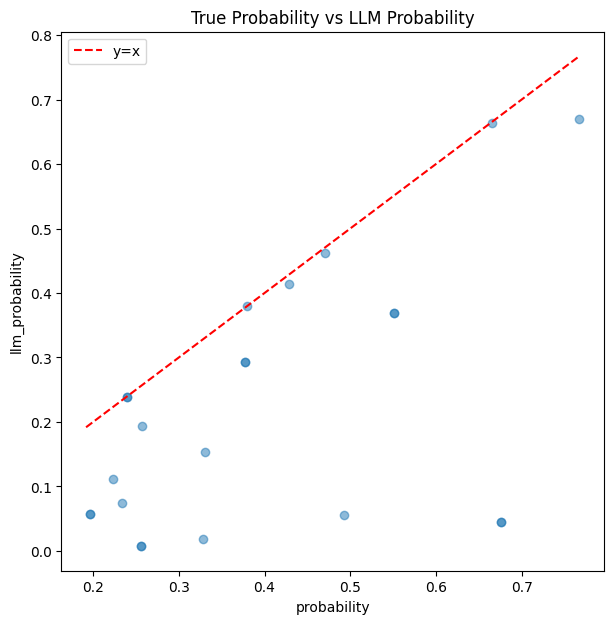

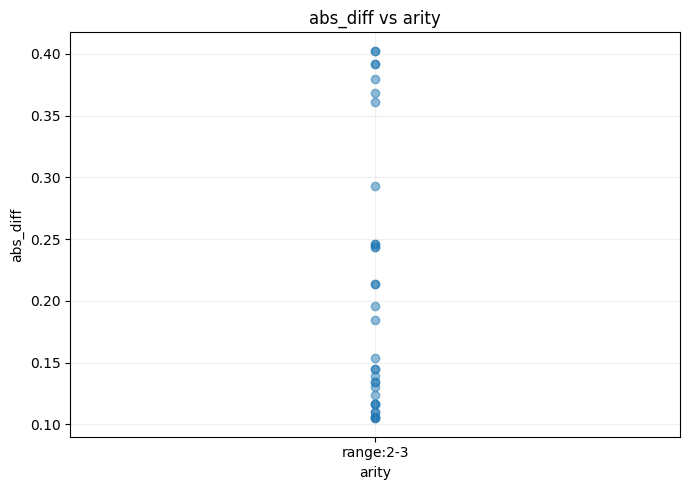

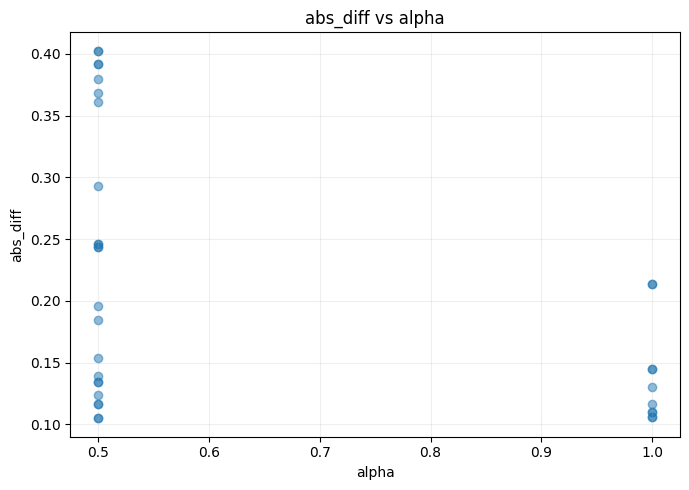

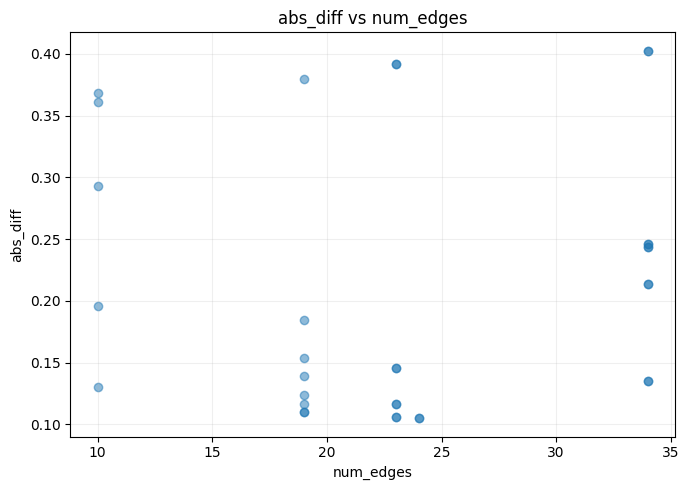

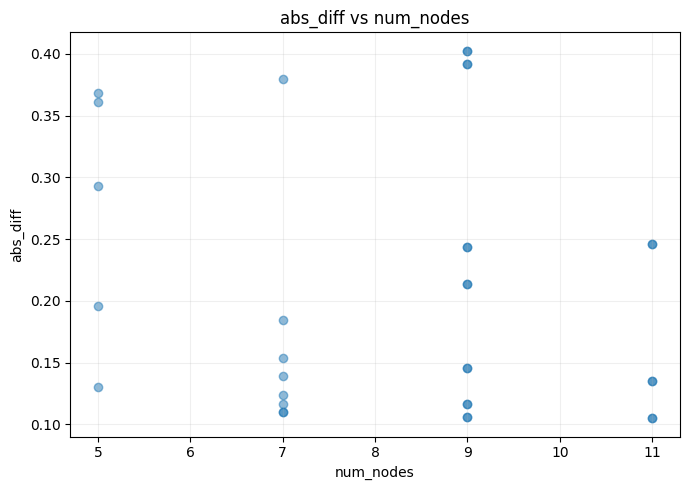

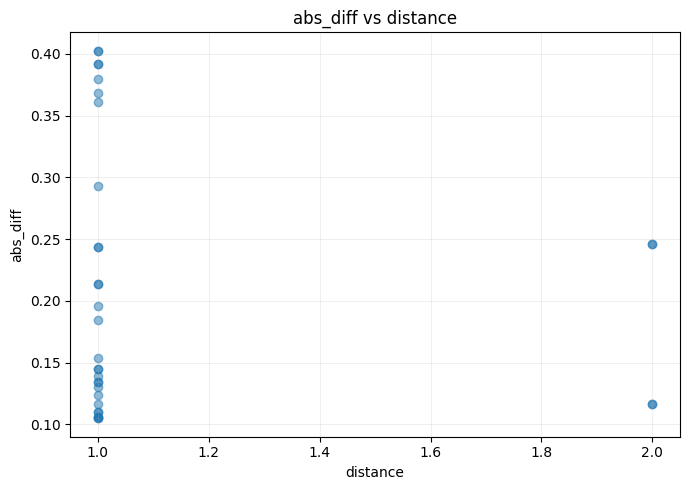

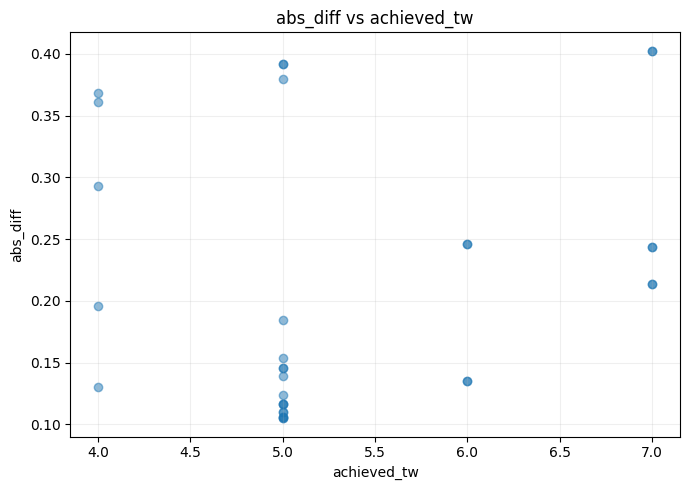

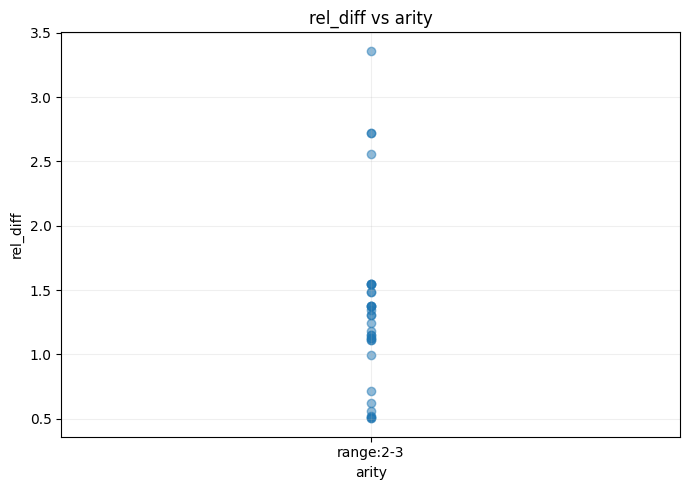

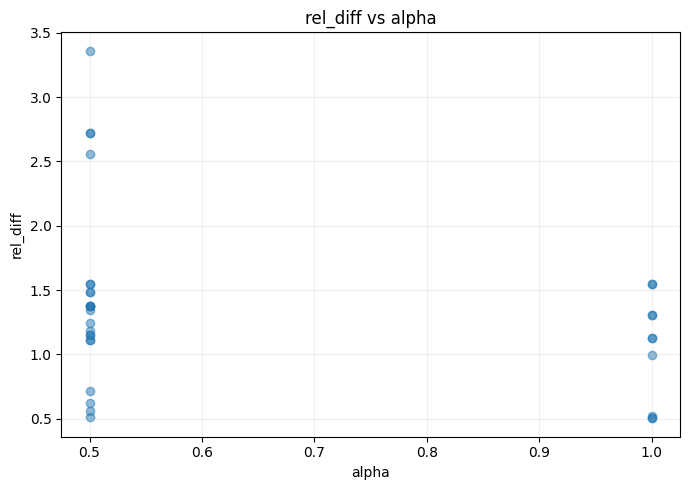

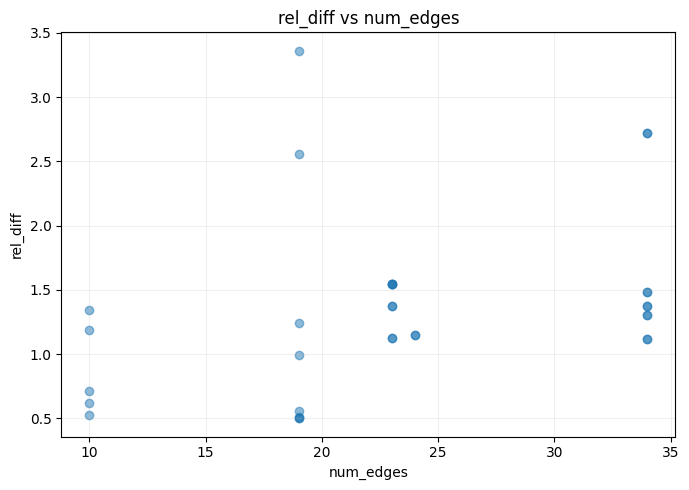

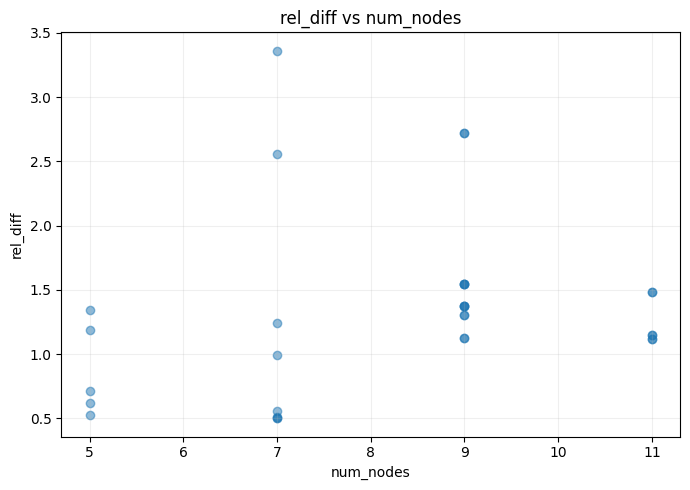

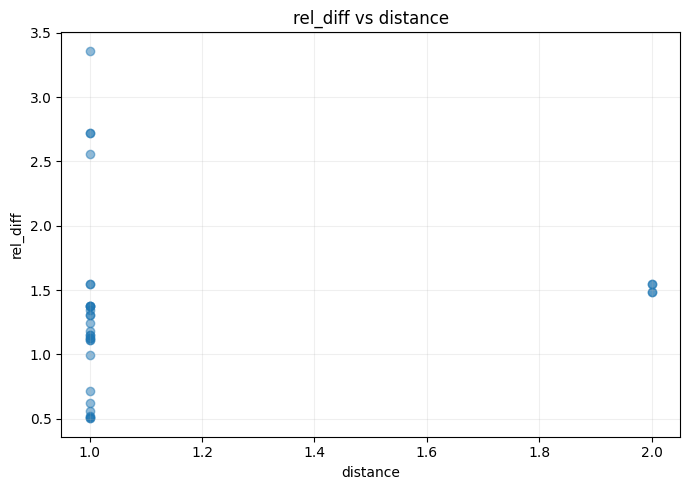

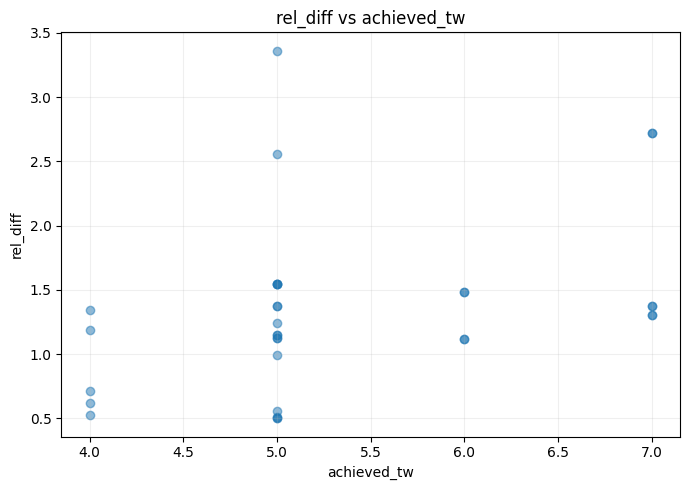

In [ ]:
import glob
import pandas as pd
import matplotlib.pyplot as plt

# Find all csv files that match the prefix
csv_files = glob.glob("llm_query_results*.csv")

# Read all csv files and stack if columns match
dfs = []
columns_set = None
for f in csv_files:
    df = pd.read_csv(f)
    if columns_set is None:
        columns_set = set(df.columns)
        dfs.append(df)
    else:
        if set(df.columns) == columns_set:
            dfs.append(df)

if dfs:
    df_all = pd.concat(dfs, ignore_index=True)
    print(f"Stacked {len(dfs)} files, final shape: {df_all.shape}")
    display(df_all.head())

    # Example plot: histogram of probability vs llm_probability if both columns exist
    if 'probability' in df_all.columns and 'llm_probability' in df_all.columns:
        plt.figure(figsize=(7, 7))
        plt.scatter(df_all["probability"], df_all["llm_probability"], alpha=0.5)
        plt.xlabel("probability")
        plt.ylabel("llm_probability")
        plt.title("True Probability vs LLM Probability")
        plt.plot([df_all['probability'].min(), df_all['probability'].max()],
                 [df_all['probability'].min(), df_all['probability'].max()],
                 color='red', linestyle='--', label='y=x')
        plt.legend()
        plt.show()
    else:
        print("probability or llm_probability column missing, skipping plot.")
else:
    print("No CSVs found with matching columns.")

# Plot absolute difference (abs_diff) against various columns if present

columns_to_plot = []

# Columns to try, checking if each is present
possible_columns = ['alpha', 'num_edges', 'num_nodes', 'distance', 'achieved_tw']
for col in possible_columns:
    if col in df_all.columns:
        columns_to_plot.append(col)

if 'abs_diff' in df_all.columns:
    for col in columns_to_plot:
        plt.figure(figsize=(7,5))
        plt.scatter(df_all[col], df_all['abs_diff'], alpha=0.5)
        plt.xlabel(col)
        plt.ylabel("abs_diff")
        plt.title(f"abs_diff vs {col}")
        plt.grid(True, alpha=0.2)
        plt.tight_layout()
        plt.show()
else:
    print("abs_diff column missing, skipping abs_diff plots.")

# Do the same plots for relative difference (rel_diff)
if 'rel_diff' in df_all.columns:
    for col in columns_to_plot:
        plt.figure(figsize=(7,5))
        plt.scatter(df_all[col], df_all['rel_diff'], alpha=0.5)
        plt.xlabel(col)
        plt.ylabel("rel_diff")
        plt.title(f"rel_diff vs {col}")
        plt.grid(True, alpha=0.2)
        plt.tight_layout()
        plt.show()
else:
    print("rel_diff column missing, skipping rel_diff plots.")
